<a href="https://colab.research.google.com/github/Renukasiwach/Datascience-codes-/blob/Master/Assignment_4_Simple_Linear_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [ ]:
salary=pd.read_csv('Salary_Data.csv')
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA And Visualization

In [ ]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
salary.shape

(30, 2)

<ipython-input-8-ab2eeefaaf36>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

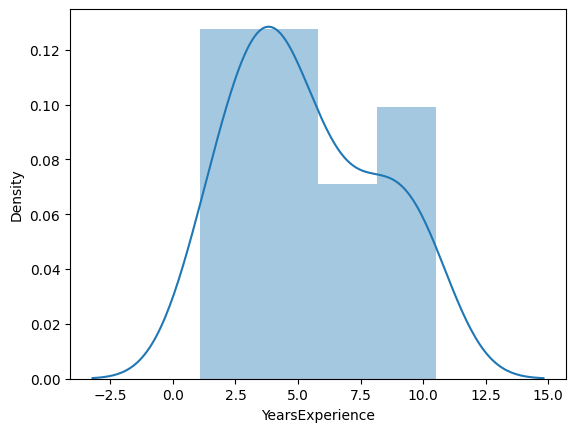

In [ ]:
sns.distplot(salary['YearsExperience'])

<ipython-input-9-36cdd9539e89>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

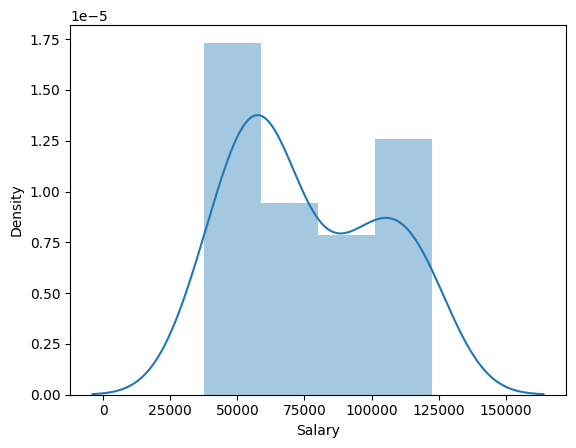

In [ ]:
sns.distplot(salary['Salary'])

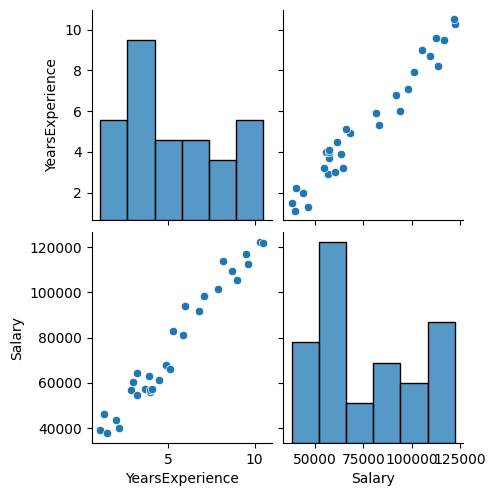

In [ ]:
sns.pairplot(salary)

In [ ]:
#correlation analysis
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Visualization of correlation between x and y.

regplot=regression plot

<Axes: xlabel='YearsExperience', ylabel='Salary'>

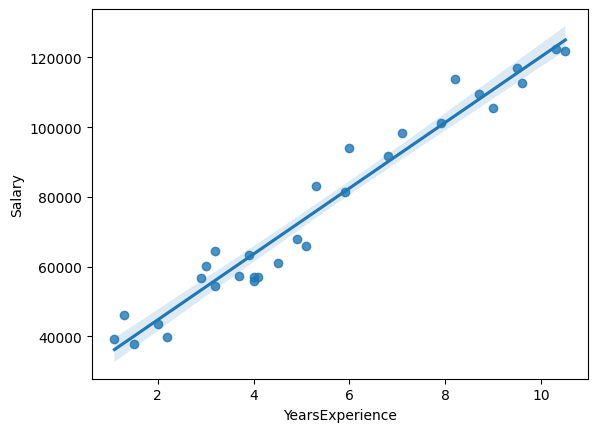

In [ ]:
sns.regplot(x=salary['YearsExperience'],y=salary['Salary'])

As you see above: There is good correlation between the two variables. The score is more than 0.8 which is good.

In [ ]:
# rename function
salary=salary.rename({'YearsExperience':'Experience'},axis=1)
salary

,Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
salary.var()

Experience    8.053609e+00
Salary        7.515510e+08
dtype: float64

Fitting a linear regression model Using Ordinary least squares regression.

It is a statistical method of analysis that estimates the relation between one or more independent variables and a dependent variables,the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predict value of the dependent variable configured as a straight line.

In [ ]:
import statsmodels.formula.api as sm
model = sm.ols('Salary~Experience',data=salary).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 12 May 2023   Prob (F-statistic):           1.14e-20
Time:                        08:45:37   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Experience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The R-squared and adjusted R-squared scores are above 0.85.
* F-statitics is quite high as well and yes desire it to be higher.
* But log-likehood is quite very low far away from 0.
*AIC and BIC score are much higher for the model.

# Square Root transformation on data

In [ ]:
model1=sm.ols('np.sqrt(Salary)~np.sqrt(Experience)',data=salary).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Fri, 12 May 2023   Prob (F-statistic):           7.58e-19
Time:                        08:45:44   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(Experience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared and adjusted R-squared scores are above 0.85,but its has gotten less than previous model.

# Cuberoot transformation on data

In [ ]:
model2=sm.ols('np.cbrt(Salary)~np.cbrt(Experience)',data=salary).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Fri, 12 May 2023   Prob (F-statistic):           6.37e-18
Time:                        08:45:48   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(Experience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log transformation on data

In [ ]:
model3=sm.ols('np.log(Salary)~np.log(Experience)',data=salary).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Fri, 12 May 2023   Prob (F-statistic):           7.40e-16
Time:                        08:45:53   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.3280      0.056    184.868      0.000      10.214      10.442
np.log(Experience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Building

As Y = Beta0+Beta1(X)

In [ ]:
# find the cofficient parameter
model.params

Intercept     25792.200199
Experience     9449.962321
dtype: float64

* Here (intercept) Beta0 value=25792.200199 & (experience) Beta1 value=9449.962321.
* Hypothesis testing of X variable by finding test_statistics and p_value for Beta1 i.e if(p_value< 0.05:Reject null)
* Null hypothesis as Beta1=0(no slope) and Alternate hypothesis as Beta1!=0(significiant slope)

In [ ]:
# find pvalue and tvalue
model.tvalues , model.pvalues

(Intercept     11.346940
 Experience    24.950094
 dtype: float64,
 Intercept     5.511950e-12
 Experience    1.143068e-20
 dtype: float64)

In [ ]:
#finding rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

Residual analysis

# Model Prediction

Test for normality of residuals(Q-Q Plot)

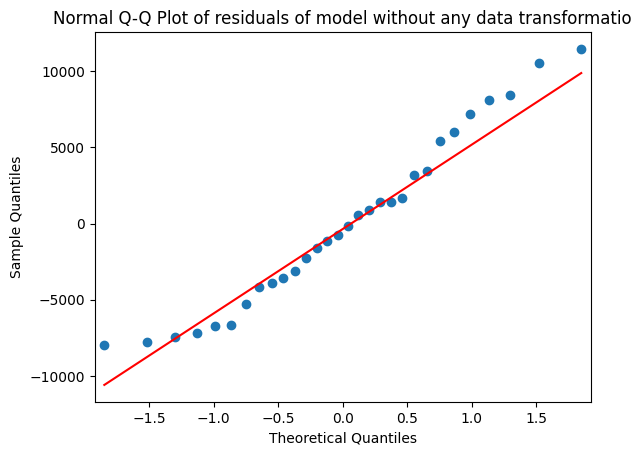

In [ ]:
sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q Plot of residuals of model without any data transformatio')
plt.show()

The first model follows normal distribution.

Residual plot to check homoscedasticity or hetroscedasticity

In [ ]:
def get_standardized_values(vals):
  return(vals-vals.mean())/vals.std()

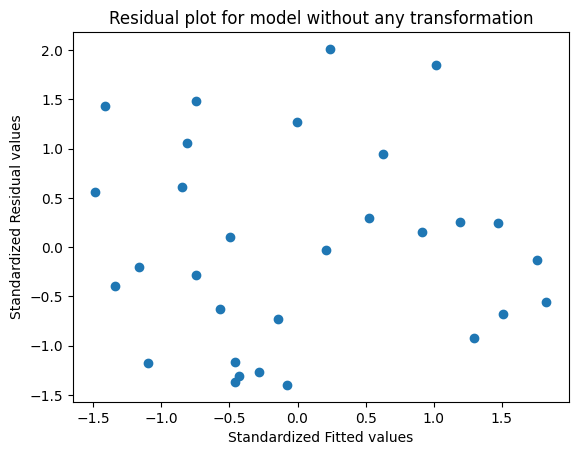

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual plot for model without any transformation')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized Residual values')
plt.show()

# Model validation

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
model1_pred_y=np.square(model1.predict(salary['Experience']))
model2_pred_y=pow(model2.predict(salary['Experience']),3)
model3_pred_y=np.exp(model3.predict(salary['Experience']))

In [ ]:
model1_rmse=np.sqrt(mean_squared_error(salary['Salary'],model1_pred_y))
model2_rmse=np.sqrt(mean_squared_error(salary['Salary'],model2_pred_y))
model3_rmse=np.sqrt(mean_squared_error(salary['Salary'],model3_pred_y))
print('Model=',np.sqrt(model.mse_resid),'\n' 'model1=',model1_rmse,'\n' 'model2=',model2_rmse,'\n' 'model3=',model3_rmse)

Model= 5788.315051119395 
model1= 5960.647096174318 
model2= 6232.815455835847 
model3= 7219.716974372806


In [ ]:
rmse={'Model': np.sqrt(model.mse_resid),'model1':model1_rmse,'model2':model2_rmse,'model3':model3_rmse}
min(rmse,key=rmse.get)

'Model'

Predicted values

In [ ]:
predicted=pd.DataFrame()
predicted['Experience']=salary.Experience
predicted['Salary']=salary.Salary
predicted['Predicted_Salary_Hike']=pd.DataFrame(model.predict(predicted.Experience))
predicted

,Experience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [ ]:
predicted1=pd.DataFrame()
predicted1['Experience']=salary.Experience
predicted1['Salary']=salary.Salary
predicted1['Predicted_Salary_Hike']=pd.DataFrame(model1.predict(predicted1.Experience))
predicted1

,Experience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,182.886226
1,1.3,46205.0,189.796000
2,1.5,37731.0,196.191728
3,2.0,43525.0,210.520663
4,2.2,39891.0,215.740898
5,2.9,56642.0,232.356055
6,3.0,60150.0,234.557719
7,3.2,54445.0,238.853599
8,3.2,64445.0,238.853599
9,3.7,57189.0,249.039339


In [ ]:
predicted2=pd.DataFrame()
predicted2['Experience']=salary.Experience
predicted2['Salary']=salary.Salary
predicted2['Predicted_Salary_Hike']=pd.DataFrame(model2.predict(predicted2.Experience))
predicted2

,Experience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,32.037381
1,1.3,46205.0,32.917940
2,1.5,37731.0,33.712229
3,2.0,43525.0,35.428378
4,2.2,39891.0,36.034215
5,2.9,56642.0,37.902975
6,3.0,60150.0,38.144390
7,3.2,54445.0,38.611581
8,3.2,64445.0,38.611581
9,3.7,57189.0,39.700017


In [ ]:
predicted3=pd.DataFrame()
predicted3['Experience']=salary.Experience
predicted3['Salary']=salary.Salary
predicted3['Predicted_Salary_Hike']=pd.DataFrame(model3.predict(predicted3.Experience))
predicted3

,Experience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,10.381616
1,1.3,46205.0,10.475515
2,1.5,37731.0,10.555951
3,2.0,43525.0,10.717653
4,2.2,39891.0,10.771226
5,2.9,56642.0,10.926505
6,3.0,60150.0,10.945561
7,3.2,54445.0,10.981837
8,3.2,64445.0,10.981837
9,3.7,57189.0,11.063442
